In [1]:
#import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, cross_val_score
from sklearn import model_selection, metrics, preprocessing
from sklearn import linear_model
from sklearn.linear_model import Lasso, LassoCV,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read dataset into the dataframe
df = pd.read_csv("AmesHousing.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
#check shape of the dataframe
df.shape

(2930, 82)

In [4]:
#check columns in the dataframe
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [5]:
#check information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [6]:
#check numerical properties of each variable
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [7]:
#check each categorical variable
cat = df.dtypes[df.dtypes == 'object'].index
df[cat].describe()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2930,2930,198,2930,2930,2930,2930,2930,2930,2930,...,2773,2771,2771,2771,2930,13,572,106,2930,2930
unique,7,2,2,4,4,3,5,3,28,9,...,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2273,2918,120,1859,2633,2927,2140,2789,443,2522,...,1731,1231,2615,2665,2652,4,330,95,2536,2413


In [8]:
#check the distribution of the target variable
df['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Checking for duplicated rows

In [9]:
df.duplicated().any()

False

# Handling missing values

In [10]:
#check total number of missing values in the dataset
df.isnull().sum().sum()

13997

In [11]:
#Finding the percentage of missing values in each variable
null_columns=df.columns[df.isnull().any()]
df_null = df[null_columns].isnull().sum()*100/len(df)
df_null.sort_values(ascending = False)

Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Yr Blt      5.426621
Garage Cond        5.426621
Garage Qual        5.426621
Garage Finish      5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
Bsmt Cond          2.730375
Bsmt Qual          2.730375
BsmtFin Type 1     2.730375
Mas Vnr Type       0.784983
Mas Vnr Area       0.784983
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
Garage Cars        0.034130
BsmtFin SF 2       0.034130
BsmtFin SF 1       0.034130
Bsmt Unf SF        0.034130
Total Bsmt SF      0.034130
Garage Area        0.034130
Electrical         0.034130
dtype: float64

#### Check for variable Pool QC

In [12]:
#Some NA in Pool QC means no pool available, So, check if missing values in Pool QC variable are 
# also missing in Pool Area to know if it is missing value or one of the class
df_pool = df.loc[df['Pool QC'].isnull()][['Pool QC', 'Pool Area']]
df_pool['Pool Area'].value_counts()
#The corresponding values in Poor Area to null values in Pool QC are all zero. So, we know that
#the values actually shown as missing aren't missing but a class 'Not Available'

0    2917
Name: Pool Area, dtype: int64

#### Check for varaible 'Fireplace QU'

In [13]:
#Similar to above,we check corresponding value in Fireplaces variable to null values in Fireplace Qu
df_pool = df.loc[df['Fireplace Qu'].isnull()][['Fireplace Qu', 'Fireplaces']]
df_pool['Fireplaces'].value_counts()
#We again know that missing values in 'Fireplace Qu' is actually a class not available

0    1422
Name: Fireplaces, dtype: int64

#### Impute null values in 'Pool QC','Misc Feature','Alley','Fence','Fireplace Qu' with class 'Not available'

In [14]:
#In some columns, na means not available, lets change those missing values to Not available
for column in ['Pool QC','Misc Feature','Alley','Fence', 'Fireplace Qu']:
    df[column].fillna('Not available', inplace = True)

#### Check for 'Lot Frontage'

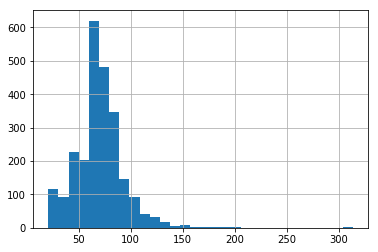

In [15]:
df['Lot Frontage'].hist(bins=30)

In [16]:
#Since data seems to be normally distributed, we will fill its null values with mean
df['Lot Frontage'].fillna((df['Lot Frontage'].mean()), inplace=True)
df['Lot Frontage'].isnull().any()

False

#### Check variables related to garage

In [17]:
#Check the number of missing values in all variables related to garage
df[['Garage Yr Blt', 'Garage Cond', 'Garage Qual', 'Garage Finish', 'Garage Type', 'Garage Cars', 'Garage Area']].isnull().sum()

Garage Yr Blt    159
Garage Cond      159
Garage Qual      159
Garage Finish    159
Garage Type      157
Garage Cars        1
Garage Area        1
dtype: int64

In [18]:
#check number of rows with all null values for 4 variables
cols_to_check = ['Garage Yr Blt', 'Garage Cond', 'Garage Qual', 'Garage Finish', 'Garage Type']
list(df[cols_to_check].isnull().apply(lambda x: all(x), axis=1)).count(True)
#There are in total 157 rows with null values for all these checked variables

157

In [19]:
#Garage also has class Not available,so lets check if missing values are really missing or the class, forthat we will check
#corresponding values in Garage Cars and Garage Area which we actually found to be all '0'
df_garage = df.loc[df['Garage Type'].isnull()][['Garage Cars', 'Garage Area']]
print(df_garage['Garage Cars'].value_counts())
print(df_garage['Garage Area'].value_counts())
#These 157 rows are actually the class Not available

0.0    157
Name: Garage Cars, dtype: int64
0.0    157
Name: Garage Area, dtype: int64


In [20]:
#Assign value not available to these 157 rows in five variables
df.loc[df['Garage Type'].isnull(),['Garage Cond', 'Garage Qual', 'Garage Finish', 
                                   'Garage Type' ]] = 'Not available'
df[['Garage Yr Blt','Garage Cond', 'Garage Qual', 'Garage Finish', 'Garage Type', 'Garage Cars', 'Garage Area']].isnull().sum()

Garage Yr Blt    159
Garage Cond        2
Garage Qual        2
Garage Finish      2
Garage Type        0
Garage Cars        1
Garage Area        1
dtype: int64

In [21]:
#Lets impute remaining missing values with the mode
for column in ['Garage Cond','Garage Qual', 'Garage Finish','Garage Cars', 'Garage Area']:
    df[column].fillna(df[column].mode()[0],inplace = True)
#Fill missing values in Garage Yr Blt as 0
df['Garage Yr Blt'].fillna(0,inplace = True)
df[['Garage Yr Blt', 'Garage Cond', 'Garage Qual', 'Garage Finish', 'Garage Type', 'Garage Cars', 'Garage Area']].isnull().sum()

Garage Yr Blt    0
Garage Cond      0
Garage Qual      0
Garage Finish    0
Garage Type      0
Garage Cars      0
Garage Area      0
dtype: int64

#### check variables related to the Basement

In [22]:
#Check number of missing values in each variable
df[['Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Qual', 'Bsmt Cond']].isnull().sum()

Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin Type 2    81
Bsmt Qual         80
Bsmt Cond         80
dtype: int64

In [23]:
#check number of rows in Basement related variable which are all null for those variables
cols_to_check = ['BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Qual', 'Bsmt Cond']
list(df[cols_to_check].isnull().apply(lambda x: all(x), axis=1)).count(True)

80

In [24]:
#Basement also has class Not available, check if the missing value shown is null or class by checking corresponding values in
#other two variables 'Total Bsmt SF' and 'Bsmt Full Bath'
df_bsmt = df.loc[df['Bsmt Cond'].isnull()][['Total Bsmt SF', 'Bsmt Full Bath']]
print(df_bsmt['Total Bsmt SF'].value_counts())
print(df_bsmt['Bsmt Full Bath'].value_counts())
df_bsmt['Bsmt Full Bath'].unique()
#78 are class  Not available, others are missing values

0.0    79
Name: Total Bsmt SF, dtype: int64
0.0    78
Name: Bsmt Full Bath, dtype: int64


array([ 0., nan])

In [25]:
#Impute those values with 'Not available' or '0' depending upon variable type
df.loc[df['Bsmt Full Bath'] == 0,['Bsmt Qual','BsmtFin Type 1',
                                  'BsmtFin Type 2','Bsmt Cond' ]] = 'Not available'
df.loc[df['Bsmt Full Bath'] == 0,['Bsmt Exposure' ]] = 0
df[['Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Qual', 'Bsmt Cond']].isnull().sum()

Bsmt Exposure     2
BsmtFin Type 1    2
BsmtFin Type 2    3
Bsmt Qual         2
Bsmt Cond         2
dtype: int64

In [26]:
#impute remaining missing values with mode
for column in ['Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Bsmt Qual', 'Bsmt Cond']:
    df[column].fillna(df[column].mode()[0], inplace=True)
df[['Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Qual', 'Bsmt Cond']].isnull().sum()

Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Bsmt Qual         0
Bsmt Cond         0
dtype: int64

In [27]:
df[df['Bsmt Half Bath'].isnull()][['Bsmt Qual','Bsmt Half Bath', 'Bsmt Full Bath', 
                                   'Total Bsmt SF', 'Bsmt Unf SF', 'BsmtFin SF 2', 'BsmtFin SF 1']]

,Bsmt Qual,Bsmt Half Bath,Bsmt Full Bath,Total Bsmt SF,Bsmt Unf SF,BsmtFin SF 2,BsmtFin SF 1
1341,Not available,NaN,NaN,NaN,NaN,NaN,NaN
1497,Not available,NaN,NaN,0.0,0.0,0.0,0.0


In [28]:
#Missing values in these variables are again the class 'Not Available'
for column in ['Bsmt Half Bath', 'Bsmt Full Bath','Total Bsmt SF', 'Bsmt Unf SF', 'BsmtFin SF 2', 'BsmtFin SF 1']:
    df[column].fillna(0,inplace = True)

#### Check missing values in  remaining variables

In [29]:
df[['Mas Vnr Type', 'Mas Vnr Area']].isnull().sum()

Mas Vnr Type    23
Mas Vnr Area    23
dtype: int64

In [30]:
cols_to_check = ['Mas Vnr Type', 'Mas Vnr Area']
list(df[cols_to_check].isnull().apply(lambda x: all(x), axis=1)).count(True)
#All missing values in both Mas Vnr Type and Mas Vnr Area  are in same rows

23

In [31]:
#The missing values in these two variables are again class 'Not available'
df['Mas Vnr Type'].fillna('Not available', inplace = True)
df['Mas Vnr Area'].fillna(0, inplace = True)
df[['Mas Vnr Type', 'Mas Vnr Area']].isnull().sum()

Mas Vnr Type    0
Mas Vnr Area    0
dtype: int64

In [32]:
#impute a missing value in variable 'Electrical' with its mode
print(df['Electrical'].isnull().sum())
df['Electrical'].fillna((df['Electrical'].mode()[0]), inplace = True)

1


In [33]:
#Check if we have imputed all missing values
df.isnull().any().unique()

array([False])

All the missing values in dataset has been imputed

# Check for outliers

In [34]:
#check all numerical features in the dataset
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

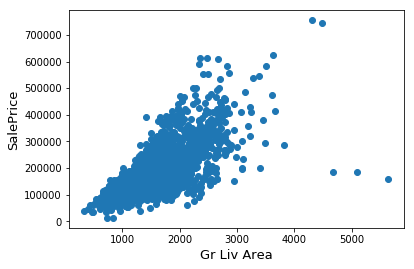

In [35]:
#There are some outliers in Gr Liv Area and SalePrice,sale price is quite low for houses with large areas,which shouldn't happen
fig, ax = plt.subplots()
ax.scatter(x = df['Gr Liv Area'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('Gr Liv Area', fontsize=13)
plt.show()

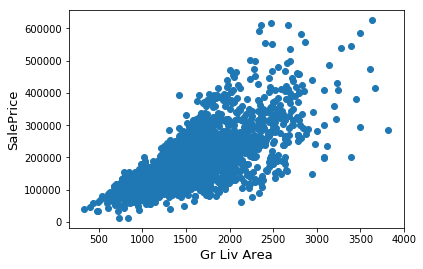

In [36]:
#Removing outliers
df = df.drop(df[(df['Gr Liv Area']>4000)].index)
fig, ax = plt.subplots()
ax.scatter(x = df['Gr Liv Area'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('Gr Liv Area', fontsize=13)
plt.show()

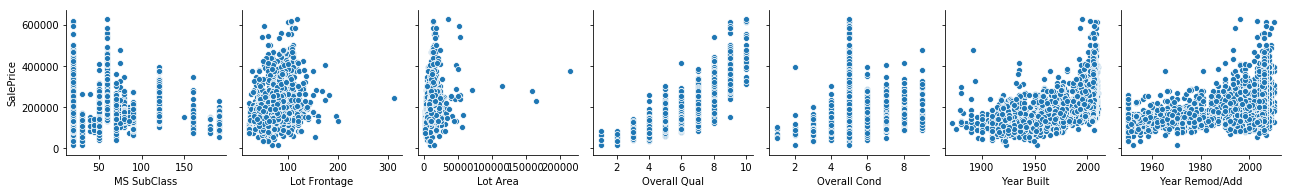

In [37]:
sns.pairplot(data=df, y_vars=['SalePrice'], x_vars=['MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add'])

In [38]:
df = df.drop(df[(df['Lot Frontage']>300)].index)
df = df.drop(df[(df['Lot Area']> 100000)].index)

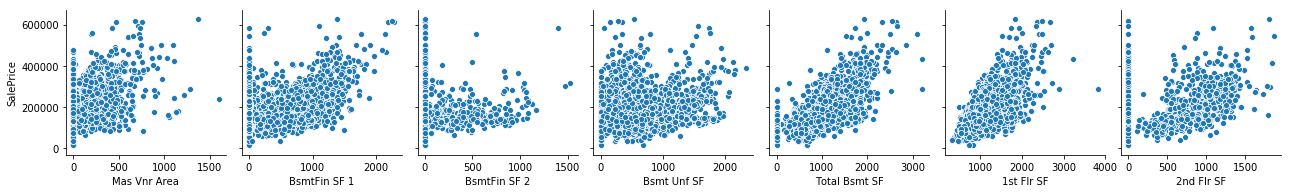

In [39]:
sns.pairplot(data=df, y_vars=['SalePrice'], x_vars=['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF'])

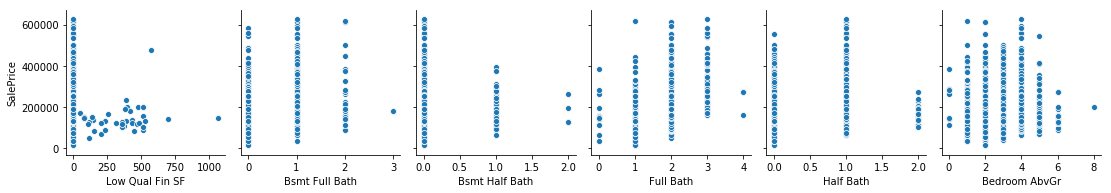

In [40]:
sns.pairplot(data=df, y_vars=['SalePrice'], x_vars=['Low Qual Fin SF','Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr'])

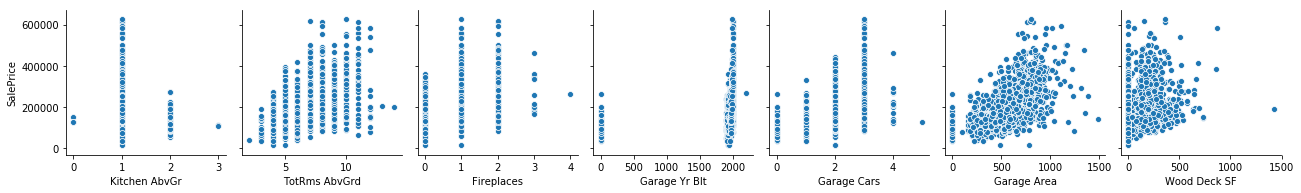

In [41]:
sns.pairplot(data=df, y_vars=['SalePrice'], x_vars=['Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF'])

In [42]:
df = df.drop(df[(df['Wood Deck SF']>1000)].index)

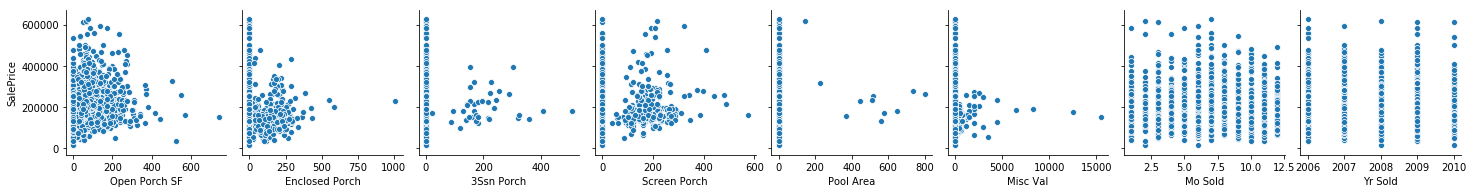

In [43]:
sns.pairplot(data=df, y_vars=['SalePrice'], x_vars=['Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'])

In [44]:
df = df.drop(df[(df['Enclosed Porch']>1000)].index)

In [45]:
df.shape

(2918, 82)

In [46]:
#Here 2207 is the wrong entry
df['Garage Yr Blt'].unique()

array([1960., 1961., 1958., 1968., 1997., 1998., 2001., 1992., 1995.,
       1999., 1993., 1990., 1985., 2003., 1988., 2010., 1951., 1978.,
       1977., 1974., 2000., 1970., 1971.,    0., 1975., 2009., 2008.,
       2005., 2004., 2002., 2006., 1996., 1994., 1980., 1979., 1984.,
       1986., 1920., 1987., 1973., 1963., 1962., 1976., 1967., 1972.,
       1966., 1964., 1950., 1949., 1954., 1955., 1959., 1957., 1956.,
       1952., 1953., 1989., 1948., 1900., 1927., 1915., 1945., 1940.,
       1938., 1928., 1930., 1926., 1939., 1942., 1923., 1917., 1910.,
       1965., 1969., 1947., 1946., 1941., 1924., 1922., 1896., 2007.,
       1983., 1981., 1991., 1982., 1916., 1925., 1936., 1935., 1931.,
       1934., 1929., 1918., 1921., 1937., 1932., 1906., 1908., 1895.,
       1933., 2207., 1914., 1943., 1919.])

In [47]:
#check corresponding value for Year built of the house
df[df['Garage Yr Blt'] == 2207.][['Year Built','Yr Sold']]

,Year Built,Yr Sold
2260,2006,2007


In [48]:
#Lets replace Garage Yr Blt by the Year Built
df['Garage Yr Blt'].replace(2207.,2006).unique()

array([1960., 1961., 1958., 1968., 1997., 1998., 2001., 1992., 1995.,
       1999., 1993., 1990., 1985., 2003., 1988., 2010., 1951., 1978.,
       1977., 1974., 2000., 1970., 1971.,    0., 1975., 2009., 2008.,
       2005., 2004., 2002., 2006., 1996., 1994., 1980., 1979., 1984.,
       1986., 1920., 1987., 1973., 1963., 1962., 1976., 1967., 1972.,
       1966., 1964., 1950., 1949., 1954., 1955., 1959., 1957., 1956.,
       1952., 1953., 1989., 1948., 1900., 1927., 1915., 1945., 1940.,
       1938., 1928., 1930., 1926., 1939., 1942., 1923., 1917., 1910.,
       1965., 1969., 1947., 1946., 1941., 1924., 1922., 1896., 2007.,
       1983., 1981., 1991., 1982., 1916., 1925., 1936., 1935., 1931.,
       1934., 1929., 1918., 1921., 1937., 1932., 1906., 1908., 1895.,
       1933., 1914., 1943., 1919.])

# Feature Engineering

#### Remove column PID and Order as it doesn't give us much information about Sales Price

In [51]:
df.drop(['PID'], axis =1, inplace = True)
df.drop(['Order'], axis =1, inplace = True)

KeyError: "['PID'] not found in axis"

In [54]:
df.shape

(2918, 80)

#### Check correlation between numeric variables

In [55]:
num_df = df.select_dtypes(exclude=['object']).copy()
num_df.shape

(2918, 37)

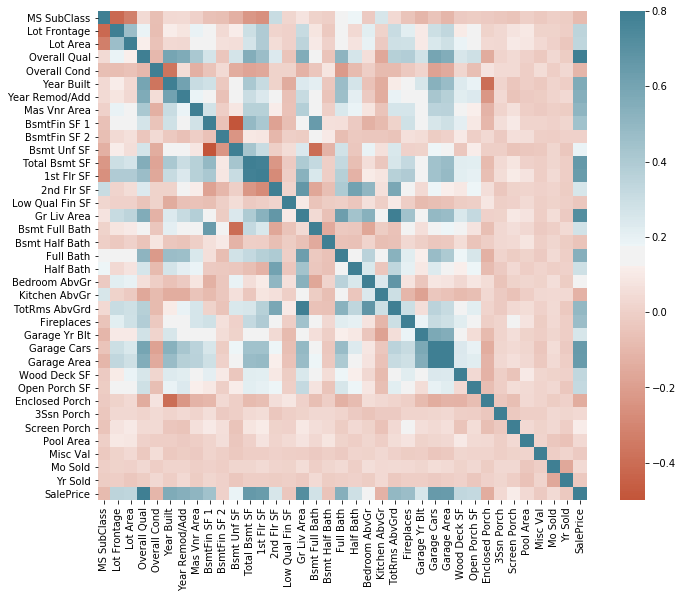

In [56]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True, cmap=sns.diverging_palette(20, 220, n=200)
);



In [57]:
#From the heat map, we can see that there is high multicollinearity between some variables, 
#so we further check it
print(df['Garage Area'].corr(df['Garage Cars']))
print(df['Gr Liv Area'].corr(df['TotRms AbvGrd']))
print(df['1st Flr SF'].corr(df['Total Bsmt SF']))

0.8912678991471448
0.8094301976690439
0.7847591594324153


In [58]:
#Since Garage Area and Garage Cars are highly collinear, 
# we can remove Garage Cars and just keep Garage Area
df.drop(['Garage Cars'], axis =1, inplace = True)
df.shape

(2918, 79)

#### Check correlation of predictor variables to SalePrice

In [59]:
#Finding most correlated variables to SalePrice
print(df.corr()['SalePrice'].sort_values(ascending = False)[:7])
print(df.corr()['SalePrice'].sort_values(ascending = True)[:7])

SalePrice        1.000000
Overall Qual     0.806210
Gr Liv Area      0.719137
Total Bsmt SF    0.658203
Garage Area      0.648724
1st Flr SF       0.641867
Year Built       0.566699
Name: SalePrice, dtype: float64
Enclosed Porch    -0.137735
Kitchen AbvGr     -0.120657
Overall Cond      -0.103761
MS SubClass       -0.086381
Bsmt Half Bath    -0.047035
Low Qual Fin SF   -0.037655
Yr Sold           -0.028314
Name: SalePrice, dtype: float64


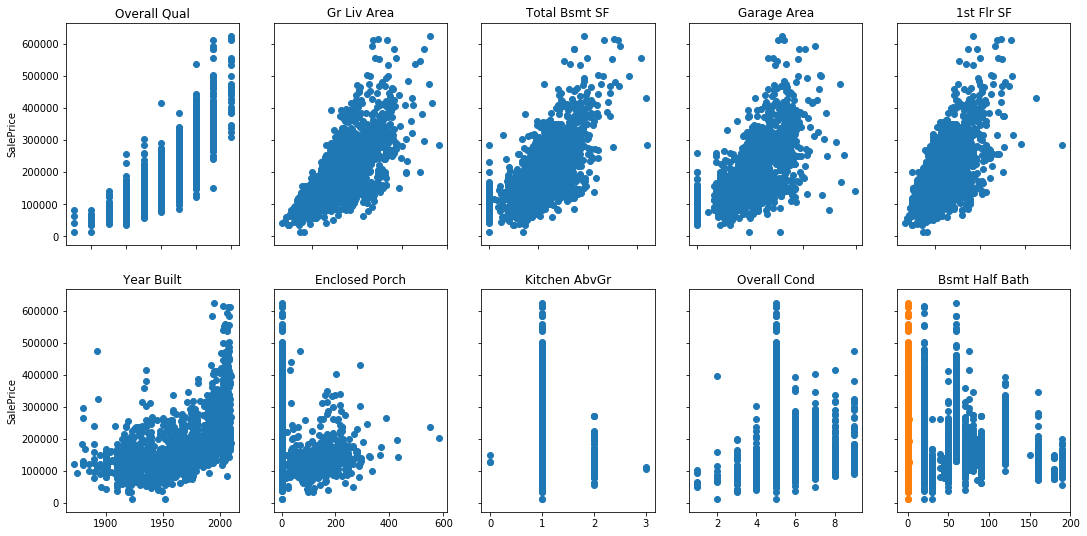

In [60]:
#Draw scatterplots of the variables that are highly correlated with SalePrice
#We found through figure that the variable "Overall Qual" with highest correlation
#is indeed highly correlated
fig, axs = plt.subplots(nrows = 2, ncols = 5,figsize=(18,9), sharey='row')
axs[0,0].scatter('Overall Qual','SalePrice',data=df,)
axs[0,0].set_title('Overall Qual')
axs[0,1].scatter('Gr Liv Area','SalePrice',data=df,)
axs[0,1].set_title('Gr Liv Area')
axs[0,2].scatter('Total Bsmt SF','SalePrice',data=df,)
axs[0,2].set_title('Total Bsmt SF')
axs[0,3].scatter('Garage Area','SalePrice',data=df,)
axs[0,3].set_title('Garage Area')
axs[0,4].scatter('1st Flr SF','SalePrice',data=df,)
axs[0,4].set_title('1st Flr SF')
axs[1,0].scatter('Year Built','SalePrice',data=df,)
axs[1,0].set_title('Year Built')
axs[1,1].scatter('Enclosed Porch','SalePrice',data=df,)
axs[1,1].set_title('Enclosed Porch')
axs[1,2].scatter('Kitchen AbvGr','SalePrice',data=df,)
axs[1,2].set_title('Kitchen AbvGr')
axs[1,3].scatter('Overall Cond','SalePrice',data=df,)
axs[1,3].set_title('Overall Cond')
axs[1,4].scatter('MS SubClass','SalePrice',data=df,)
axs[1,4].set_title('MS SubClass')
axs[1,4].scatter('Bsmt Half Bath','SalePrice',data=df,)
axs[1,4].set_title('Bsmt Half Bath')

for ax in axs.flat:
    ax.set(ylabel='SalePrice')
    ax.label_outer()


#### Transforming the skewed variable using Log Transformation

Checking target variable SalePrice

/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


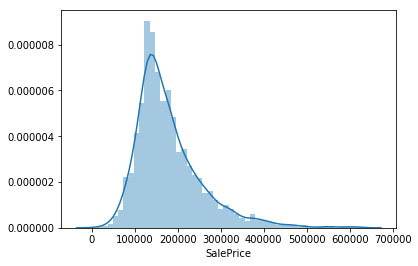

In [61]:
#Check the distribution of the response variable
sns.distplot(df['SalePrice']) #Deviate from normal distribution #is positively skewed #Show peakedness

In [62]:
#The skewness is greater than 1 hence higly skewed to right
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.598661
Kurtosis: 3.877085


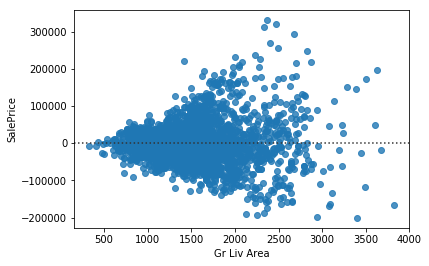

In [63]:
#Even the residual plot has some symmetry which shouldn't happen
sns.residplot(df['Gr Liv Area'],df['SalePrice'])

In [64]:
#Since the Sale Price is skewed to the right, ets take log+1 of Sale Price so that the error from highest value and 
#lowest value have similar effect in model building
df['SalePrice'] = np.log1p(df['SalePrice'])

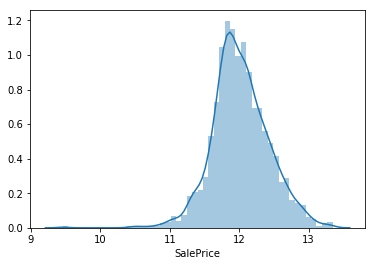

In [65]:
sns.distplot(df['SalePrice'])

In [66]:
#The skewness got better after the normalization
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: -0.039505
Kurtosis: 1.472360


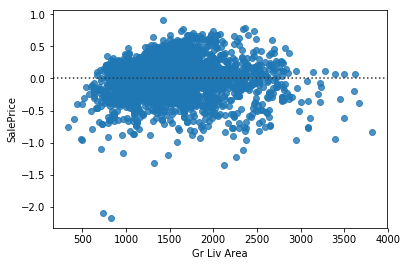

In [67]:
sns.residplot(df['Gr Liv Area'],df['SalePrice'])

#### Changing categorical variable to numeric

In [68]:
df.dtypes.value_counts()

object     43
int64      25
float64    11
dtype: int64

In [69]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,Not available,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,P,Not available,Not available,Not available,WD,Normal
1,RH,Pave,Not available,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,Not available,MnPrv,Not available,WD,Normal
2,RL,Pave,Not available,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Not available,Not available,Gar2,WD,Normal
3,RL,Pave,Not available,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,Not available,Not available,Not available,WD,Normal
4,RL,Pave,Not available,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,Not available,MnPrv,Not available,WD,Normal


In [70]:
obj_df.columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

#### Converting Ordinal variables

In [71]:
#Lets replace values in ordinal variables with ordinal values
df = df.replace({"Alley" : {"Not available":0, "Grvl" : 1, "Pave" : 2},
                "Bsmt Cond": {"Not available" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                 "Bsmt Exposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                 "BsmtFin Type 1" : {"Not available" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                 "BsmtFin Type 2" : {"Not available" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                 "Bsmt Qual" : {"Not available" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                 "Exter Cond" : {"Not available":0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                 "Exter Qual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                 "Fireplace Qu" : {"Not available" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                 "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                 "Garage Cond" : {"Not available" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                 "Garage Qual" : {"Not available" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                 "Heating QC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                 "Kitchen Qual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                 "Land Slope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                 "Lot Shape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                 "Paved Drive" : {"N" : 0, "P" : 1, "Y" : 2},
                 "Pool QC" : {"Not available" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                 "Street" : {"Grvl" : 1, "Pave" : 2},
                 "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
                 "Electrical" : {"SBrkr" :5, "FuseA" : 3, "FuseF" : 2, "FuseP" : 1, "Mix" :4 },
                "Garage Finish" : {"Fin" : 3, "RFn" : 2, "Unf" : 1, "Not available" : 0 }})            

In [72]:
df.dtypes.value_counts()
#We have now 21 remaining categorical variables which are nominal

int64      47
object     21
float64    11
dtype: int64

#### Converting Nominal Variables

In [73]:
nominal_df = df.select_dtypes(include=['object']).copy()
nominal_df.columns

Index(['MS Zoning', 'Land Contour', 'Lot Config', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Fence',
       'Misc Feature', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [74]:
for column in nominal_df.columns:
    print(column,'\t\t',len(df[column].unique()))

MS Zoning 		 7
Land Contour 		 4
Lot Config 		 5
Neighborhood 		 28
Condition 1 		 9
Condition 2 		 8
Bldg Type 		 5
House Style 		 8
Roof Style 		 6
Roof Matl 		 7
Exterior 1st 		 16
Exterior 2nd 		 17
Mas Vnr Type 		 6
Foundation 		 6
Heating 		 6
Central Air 		 2
Garage Type 		 7
Fence 		 5
Misc Feature 		 5
Sale Type 		 10
Sale Condition 		 6


In [75]:
print(df['Exterior 1st'].unique())
print(df['Exterior 2nd'].unique())

['BrkFace' 'VinylSd' 'Wd Sdng' 'CemntBd' 'HdBoard' 'Plywood' 'MetalSd'
 'AsbShng' 'WdShing' 'Stucco' 'AsphShn' 'BrkComm' 'CBlock' 'PreCast'
 'Stone' 'ImStucc']
['Plywood' 'VinylSd' 'Wd Sdng' 'BrkFace' 'CmentBd' 'HdBoard' 'Wd Shng'
 'MetalSd' 'ImStucc' 'Brk Cmn' 'AsbShng' 'Stucco' 'AsphShn' 'CBlock'
 'Stone' 'PreCast' 'Other']


In [76]:
print(df['Neighborhood'].unique())

['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']


In [77]:
print(df['Sale Type'].unique())

['WD ' 'New' 'COD' 'ConLI' 'Con' 'ConLD' 'Oth' 'ConLw' 'CWD' 'VWD']


In [78]:
#convert nominal variable to numeric using one-hot encoding
obj_df = list(df.select_dtypes(include=['object']).columns)
dummies = pd.get_dummies(df[obj_df])
df.drop(obj_df, axis=1, inplace = True)
df= pd.concat([df,dummies], axis =1 )

In [79]:
df.dtypes.value_counts()

uint8      173
int64       47
float64     11
dtype: int64

In [80]:
df.shape

(2918, 231)

In [81]:
len((df.select_dtypes(include=['object'])).columns)
#All the variables have been conducted to numeric type

0

# Model Creation

# Multiple Linear Regression

In [82]:
x = df.drop('SalePrice', axis =1)
y = df['SalePrice']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.25, random_state = 3)

In [83]:
lm = linear_model.LinearRegression()
lm.fit(xTrain, yTrain)
lm_pred = lm.predict(xTest)
print(lm.score(xTrain, yTrain))
print(lm.score(xTest, yTest))
print('MAE', metrics.mean_absolute_error(yTest,lm_pred))
print('MSE', metrics.mean_squared_error(yTest,lm_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(yTest,lm_pred)))
print('R2 score:', metrics.r2_score(yTest, lm_pred))

0.9410427622635528
0.9111711441549
MAE 0.08089873905993633
MSE 0.01495271638294588
RMSE 0.12228130021775971
R2 score: 0.9111711441549


/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


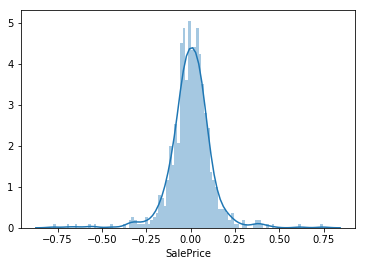

In [84]:
sns.distplot((yTest-lm_pred), bins = 100)

In [85]:
#Top 10 important positive coefficient 
cdf = pd.DataFrame(lm.coef_,x.columns,columns =['Coeff'])
cdf.sort_values('Coeff', ascending = False).head(10)

,Coeff
Exterior 1st_CBlock,0.644951
Neighborhood_GrnHill,0.425101
Exterior 1st_PreCast,0.233784
Exterior 2nd_PreCast,0.233784
MS Zoning_RH,0.201059
MS Zoning_RL,0.179963
Roof Matl_Membran,0.172357
MS Zoning_I (all),0.171789
Exterior 2nd_CmentBd,0.171618
MS Zoning_FV,0.167083


In [86]:
cdf.sort_values('Coeff', ascending = True).head(10)

,Coeff
MS Zoning_A (agr),-0.852783
Exterior 2nd_CBlock,-0.509091
Mas Vnr Type_CBlock,-0.429181
Misc Feature_TenC,-0.209985
Exterior 1st_CemntBd,-0.194878
Exterior 1st_AsbShng,-0.163849
Neighborhood_MeadowV,-0.136746
Exterior 2nd_Stone,-0.133923
Exterior 1st_BrkComm,-0.127796
Exterior 1st_AsphShn,-0.109343


#### Crossvalidation

In [87]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, x, y, cv=5, scoring='neg_mean_squared_error')
print('Cross-validated scores:', scores.mean())

Cross-validated scores: -0.015778656017264348


# Lasso Regression

In [88]:
scaler = StandardScaler()
xTrain = scaler.fit(xTrain).transform(xTrain)
xTest = scaler.fit(xTest).transform(xTest)

/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [89]:
lasso = LassoCV()
lasso.fit(xTrain,yTrain)
lasso_pred = lasso.predict(xTest)
print(lasso.score(xTrain, yTrain))
print(lasso.score(xTest, yTest))
print('MAE', metrics.mean_absolute_error(yTest,lasso_pred))
print('MSE', metrics.mean_squared_error(yTest,lasso_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(yTest,lasso_pred)))
print('R2 score:', metrics.r2_score(yTest, lasso_pred))

0.9317594336233824
0.9205805703312733
MAE 0.0788922452047148
MSE 0.01336881124758172
RMSE 0.11562357565644525
R2 score: 0.9205805703312733


/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [90]:
#Most important 10 features with positive coefficient
cdf = pd.DataFrame(lasso.coef_,x.columns,columns =['Coeff'])
cdf.sort_values('Coeff', ascending = False).head(10)

,Coeff
Gr Liv Area,0.127153
Overall Qual,0.090735
Year Built,0.052353
Overall Cond,0.038076
Total Bsmt SF,0.036228
BsmtFin SF 1,0.028306
Garage Area,0.024440
Lot Area,0.022143
Functional,0.018292
Neighborhood_Crawfor,0.016069


In [91]:
#Most important 10 features with positive coefficient
cdf.sort_values('Coeff', ascending = True).head(10)

,Coeff
Sale Condition_Abnorml,-0.021541
MS Zoning_A (agr),-0.016196
MS Zoning_C (all),-0.013707
MS Zoning_RM,-0.011889
Central Air_N,-0.011138
Exterior 1st_AsbShng,-0.010308
Neighborhood_MeadowV,-0.008293
Kitchen AbvGr,-0.007498
Bldg Type_Twnhs,-0.007105
Mas Vnr Type_CBlock,-0.005878


Text(0.5, 1.0, 'Variables with highest coefficients')

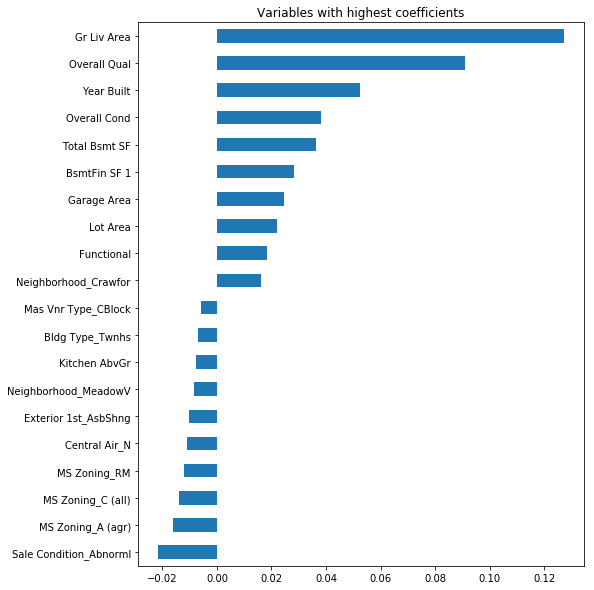

In [92]:
coef = pd.Series(lasso.coef_,index = cdf.index)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Variables with highest coefficients")

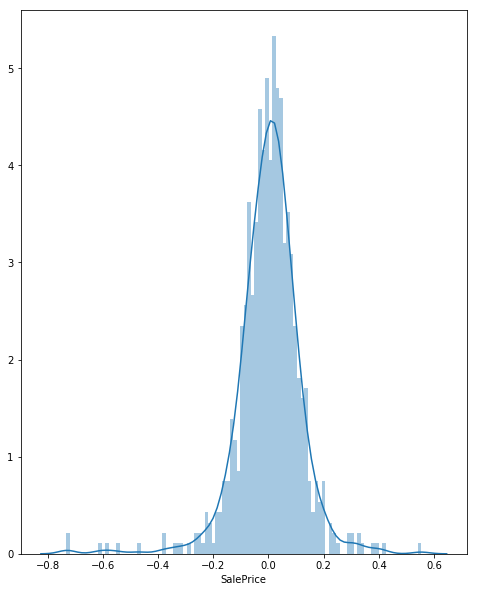

In [93]:
sns.distplot((yTest-lasso_pred), bins = 100)

#### Crossvalidation

In [94]:
# Perform 5-fold cross validation
scores = cross_val_score(lasso, x, y, cv=5, scoring='neg_mean_squared_error')
print('Cross-validated scores:', scores.mean())

/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You sho

Cross-validated scores: -0.02884057020906599


/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


# Ridge Regression

In [95]:
ridge = Ridge()
ridge.fit(xTrain,yTrain)
ridge_pred = ridge.predict(xTest)
print(ridge.score(xTrain, yTrain))
print(ridge.score(xTest, yTest))
print('MAE', metrics.mean_absolute_error(yTest,ridge_pred))
print('MSE', metrics.mean_squared_error(yTest,ridge_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(yTest,ridge_pred)))
print('R2 score:', metrics.r2_score(yTest, ridge_pred))

0.9410422785066208
0.9132315754430493
MAE 0.08069379184608519
MSE 0.01460588038708469
RMSE 0.12085479050118242
R2 score: 0.9132315754430493


In [96]:
# Perform 5-fold cross validation
scores = cross_val_score(ridge, x, y, cv=5, scoring='neg_mean_squared_error')
print('Cross-validated scores:', scores.mean())

Cross-validated scores: -0.013944390873273904


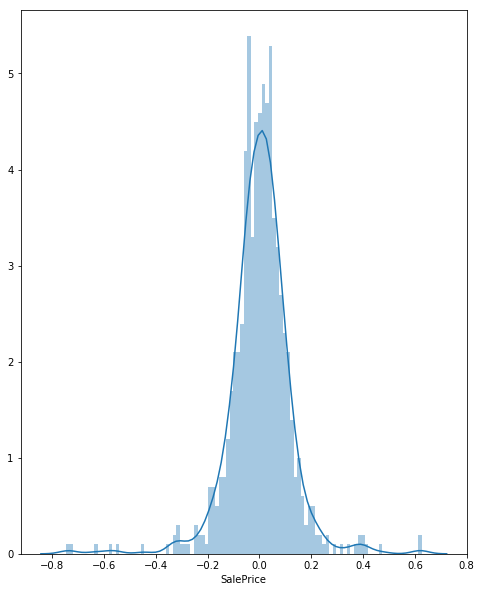

In [97]:
sns.distplot((yTest-ridge_pred), bins = 100)

# Learning curves

#### Multiple Linear Regression    

(-0.5, 5)

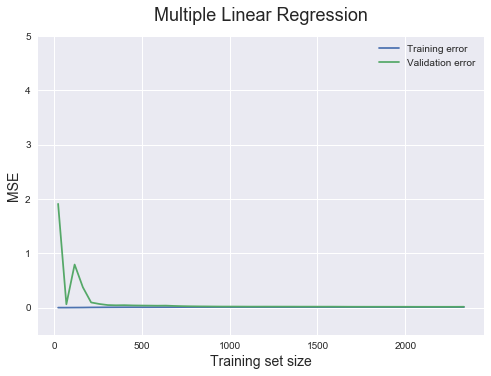

In [98]:
train_sizes,train_scores,validation_scores = learning_curve(estimator = lm,X =x,y =y,train_sizes = np.linspace(0.01, 1.0, 50),cv = 5,
                                                            scoring = 'neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Multiple Linear Regression', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(-0.5,5)

#### Lasso Regression

/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You sho

/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You sho

/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You sho

/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You sho

/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You sho

/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You sho

/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You sho

/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You sho

/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/amarnathgayathri/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You sho

(-0.01, 0.1)

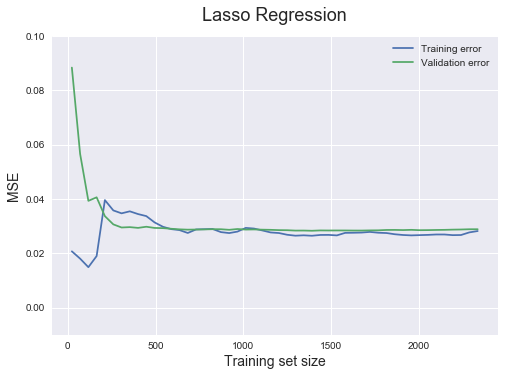

In [99]:
train_sizes,train_scores,validation_scores = learning_curve(estimator = lasso,X =x,y =y,train_sizes = np.linspace(0.01, 1.0, 50),cv = 5,
                                                            scoring = 'neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Lasso Regression', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(-0.01,0.1)

#### Ridge Regression

(-0.01, 0.1)

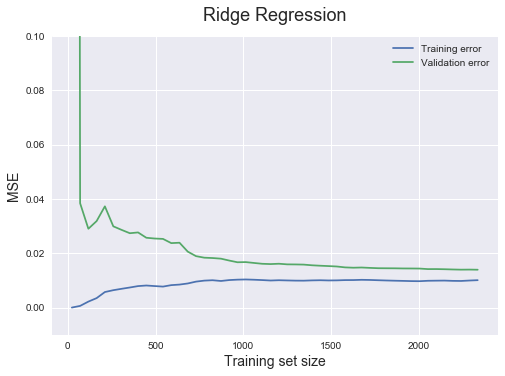

In [100]:
train_sizes,train_scores,validation_scores = learning_curve(estimator = ridge,X =x,y =y,train_sizes = np.linspace(0.01, 1.0, 50),cv = 5,
                                                            scoring = 'neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Ridge Regression', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(-0.01,0.1)

# <hr> <br><br><center>...........THE END.........</center> <br><br><hr>